In [1]:
from BackTranslation import BackTranslation
trans = BackTranslation(url=[
      'translate.google.com',
      'translate.google.co.kr',
    ], proxies={'http': '127.0.0.1:1234', 'http://host.name': '127.0.0.1:4012'})
result = trans.translate('hello', src='en', tmp = 'zh-cn')
print(result.result_text)

Hello


In [2]:
trans = BackTranslation(url=[
      'translate.google.com',
      'translate.google.co.kr',
    ], proxies={'http': '127.0.0.1:1234', 'http://host.name': '127.0.0.1:4012'})
result = trans.translate('Buy the ring. Insure it. Let her wear it for awhile. Pay someone to steal from her. Collect the insurance. Split the resale value with the thief. She will be too scared to want a big ring. Buy a cheap band. Turn a profit.', src='en', tmp = 'zh-cn')
print(result.result_text)

Buy ring.Make sure it.Let her wear it for a while.Give her to steal her.Collect insurance.Divide the resale value into a thief.She will be too afraid of wanting a big ring.Buy cheap bands.make money.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")

In [3]:
print(df.loc[[633]].text.values)

["[USER] I may be in the minority but I get a kick out of the female form, even dressed like that. Provided, of course, that there's nothing extra visible and hanging over :)"]


In [4]:
from transformers import MarianMTModel, MarianTokenizer

In [6]:
# Get the name of the first model
first_model_name = 'Helsinki-NLP/opus-mt-en-fr'

# Get the tokenizer
first_model_tkn = MarianTokenizer.from_pretrained(first_model_name,  force_download=True)

# Load the pretrained model based on the name
first_model = MarianMTModel.from_pretrained(first_model_name,  force_download=True)

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mufdu\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

In [7]:
second_model_name = 'Helsinki-NLP/opus-mt-fr-en'

# Get the tokenizer
second_model_tkn = MarianTokenizer.from_pretrained(second_model_name)

# Load the pretrained model based on the name
second_model = MarianMTModel.from_pretrained(second_model_name)

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

In [8]:
original_texts = [
    "This article aims to perform the back translation for text data augmentation",
    "It is the 25th article by Zoumana on Medium. He loves to give back to the community",
    "The first model translates from English to French, which is a temporary process",
    "The second model finally translates back all the temporary french text into English"
]

In [9]:
def format_batch_texts(language_code, batch_texts):
  
  formated_bach = [">>{}<< {}".format(language_code, text) for text in batch_texts]

  return formated_bach

def perform_translation(batch_texts, model, tokenizer, language="fr"):
    # Prepare the text data into appropriate format for the model
    formated_batch_texts = format_batch_texts(language, batch_texts)
    
    # Generate translation using model
    translated = model.generate(**tokenizer(formated_batch_texts, return_tensors="pt", padding=True))

    # Convert the generated tokens indices back into text
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    
    return translated_texts

def combine_texts(original_texts, back_translated_batch):
  
  return set(original_texts + back_translated_batch) 
  
def perform_back_translation_with_augmentation(batch_texts, original_language="en", temporary_language="fr"):

  # Translate from Original to Temporary Language
  tmp_translated_batch = perform_translation(batch_texts, first_model, first_model_tkn, temporary_language)

  # Translate Back to English
  back_translated_batch = perform_translation(tmp_translated_batch, second_model, second_model_tkn, original_language)

  # Return The Final Result
  return combine_texts(original_texts, back_translated_batch)

In [10]:
final_augmented = perform_back_translation_with_augmentation(original_texts)
print(final_augmented)

c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\generation\utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'This article aims to perform back translation for text data increase', "This is Zoumana's 25th article on Medium. He likes to give back to the community.", 'This article aims to perform the back translation for text data augmentation', 'The first model translates from English to French, which is a temporary process', 'The second model finally translates all the temporary French text into English', 'It is the 25th article by Zoumana on Medium. He loves to give back to the community', 'The second model finally translates back all the temporary french text into English'}


In [48]:
df = df[df['label_sexist'] == 'sexist']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 8 to 13995
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       3398 non-null   object
 1   text            3398 non-null   object
 2   label_sexist    3398 non-null   object
 3   label_category  3398 non-null   object
 4   label_vector    3398 non-null   object
dtypes: object(5)
memory usage: 159.3+ KB


In [40]:
# list_vector = df.label_vector.to_list()
# types_vector = set(list_vector)
# print(types_vector)

# list_of_lists=[]
# new_df = df[df['label_vector'] == '3.3 backhanded gendered compliments']

# df = df[df.label_vector != '3.3 backhanded gendered compliments']
# new_row = {'rewire_id': ['asdas' + str(1)], 'text': ['asdasd'], 'label_sexist': ['sexist'], 'label_category': ['3. animosity'], 'label_vector': ['3.3 backhanded gendered compliments']}
# new_row2 = {'rewire_id': ['asdas' + str(2)], 'text': ['assdsdcdasd'], 'label_sexist': ['sexist'], 'label_category': ['3. animosity'], 'label_vector': ['3.3 backhanded gendered compliments']}
# list_of_lists.append(new_row)
# list_of_lists.append(new_row2)
# for i in list_of_lists:
#     df = pd.concat([df, pd.DataFrame.from_records(i)], ignore_index=True)
    
# new_df = df[df['label_vector'] == '3.3 backhanded gendered compliments']
# new_df.info()
# for t in types_vector:
#   list_of_lists = []
#   new_df = df[df['label_vector'] == t]
#   print(t)
#   print("Old records",new_df.shape[0])

#   category = new_df["label_category"].values[0]
#   texts = new_df.text.to_list()
#   final_augmented = perform_back_translation_with_augmentation(texts)
#   df = df[df.label_vector != t]
#   count = 0
#   for i in final_augmented:
#     new_row = {'rewire_id': [t + str(count)], 'text': [i], 'label_sexist': ['sexist'], 'label_category': [category], 'label_vector': [t]}
#     count = count + 1 
#     list_of_lists.append(new_row)

#   df = pd.concat([df, pd.DataFrame.from_records(new_row)])
#   new_df = df[df['label_vector'] == t]
#   print("New records",new_df.shape[0])

{'3.3 backhanded gendered compliments', '2.1 descriptive attacks', '1.2 incitement and encouragement of harm', '2.3 dehumanising attacks & overt sexual objectification', '4.1 supporting mistreatment of individual women', '3.4 condescending explanations or unwelcome advice', '3.2 immutable gender differences and gender stereotypes', '3.1 casual use of gendered slurs, profanities, and insults', '1.1 threats of harm', '2.2 aggressive and emotive attacks', '4.2 supporting systemic discrimination against women as a group'}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 3334 to 3335
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       2 non-null      object
 1   text            2 non-null      object
 2   label_sexist    2 non-null      object
 3   label_category  2 non-null      object
 4   label_vector    2 non-null      object
dtypes: object(5)
memory usage: 96.0+ bytes


In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
for index, row in df.iterrows():
  original_text = '>>fr<<' + row['text']
  translated = first_model.generate(**first_model_tkn(original_text, return_tensors="pt", padding=True))
  translated_texts = [first_model_tkn.decode(t, skip_special_tokens=True) for t in translated]
  back_translated = second_model.generate(**second_model_tkn(translated_texts, return_tensors="pt", padding=True))
  back_translated_texts = [second_model_tkn.decode(t, skip_special_tokens=True) for t in back_translated]
  if row['text'] != back_translated_texts[0]:
    new_row = {'rewire_id': row["rewire_id"], 'text':back_translated_texts[0], 'label_sexist':row["label_sexist"], 'label_category':row["label_category"], 'label_vector':row["label_vector"]}
    df = df.append(new_row, ignore_index=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748 entries, 0 to 6747
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       6748 non-null   object
 1   text            6748 non-null   object
 2   label_sexist    6748 non-null   object
 3   label_category  6748 non-null   object
 4   label_vector    6748 non-null   object
dtypes: object(5)
memory usage: 263.7+ KB


In [53]:
df.to_csv('new_data.csv') 

Text(0.5, 0, 'label')

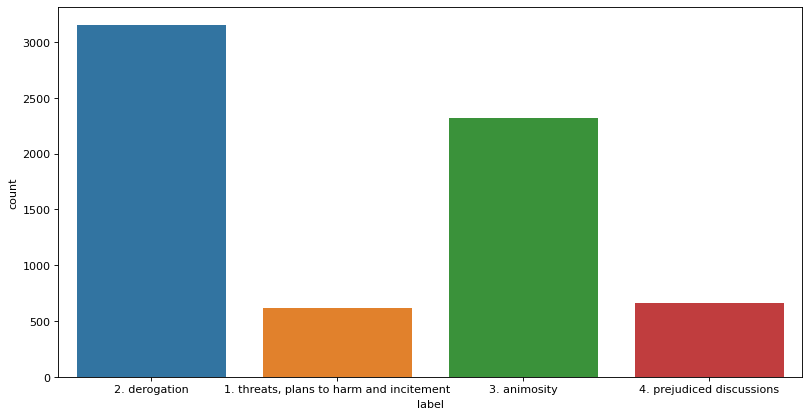

In [56]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_category)
plt.xlabel('label')